<a href="https://colab.research.google.com/github/efeecllk/nlp/blob/main/book_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


In [3]:
# Download the dataset
!wget https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv

# Load the dataset into a pandas DataFrame
df = pd.read_csv('books.csv')

# Display the first 5 rows of the dataset
print(df.head())


--2024-12-23 01:50:13--  https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3286659 (3,1M) [text/plain]
Saving to: ‘books.csv.2’

books.csv.2         100%[===================>]   3,13M   467KB/s    in 6,4s    

2024-12-23 01:50:20 (498 KB/s) - ‘books.csv.2’ saved [3286659/3286659]

   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015849   
3        4               2657          2657  3275794          487   61120081   
4        5    

In [5]:
print(df.columns)

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')


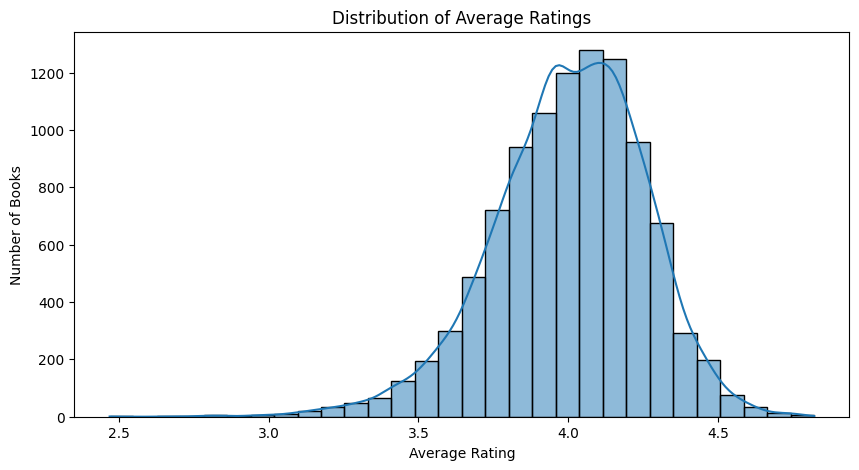

In [3]:
# Plot the distribution of average ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.show()


In [6]:
# Combine title, authors, and description into a single text field
df['content'] = df['title'] + ' ' + df['authors']

# Display a few rows to verify
print(df[['title', 'content']].head())


                                               title  \
0            The Hunger Games (The Hunger Games, #1)   
1  Harry Potter and the Sorcerer's Stone (Harry P...   
2                            Twilight (Twilight, #1)   
3                              To Kill a Mockingbird   
4                                   The Great Gatsby   

                                             content  
0  The Hunger Games (The Hunger Games, #1) Suzann...  
1  Harry Potter and the Sorcerer's Stone (Harry P...  
2            Twilight (Twilight, #1) Stephenie Meyer  
3                   To Kill a Mockingbird Harper Lee  
4               The Great Gatsby F. Scott Fitzgerald  


In [7]:
# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=2000)

# Transform the content field into a TF-IDF matrix
X = tfidf.fit_transform(df['content'])

# Display the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (10000, 2000)


In [8]:
def recommend_book(title, df=df, X=X):
    # Find the index of the given book title
    idx = df[df['title'].str.contains(title, case=False)].index[0]

    # Get the TF-IDF vector for the query book
    query = X[idx]

    # Calculate cosine similarity between the query book and all other books
    scores = cosine_similarity(query, X).flatten()

    # Get the indices of the top 5 most similar books (excluding the query book)
    recommended_idx = (-scores).argsort()[1:6]

    # Return the titles of the recommended books
    return df['title'].iloc[recommended_idx]


In [9]:
# Get recommendations for 'The Hobbit'
recommendations = recommend_book('The Hobbit')
print(f"Recommended books for 'The Hobbit':")
print(recommendations)


Recommended books for 'The Hobbit':
2308                                The Children of Húrin
4975         Unfinished Tales of Númenor and Middle-Earth
610              The Silmarillion (Middle-Earth Universe)
963     J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
154            The Two Towers (The Lord of the Rings, #2)
Name: title, dtype: object
